In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

## Import data file, preprocessing and grouping

In [3]:
df = pd.read_csv("owid-co2-data.csv")

In [4]:
df.shape

(50598, 79)

Delete empty data columns

In [5]:
df = df[df['country']=='India']
df = df.dropna(how='all', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 21294 to 21465
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    172 non-null    object 
 1   year                                       172 non-null    int64  
 2   iso_code                                   172 non-null    object 
 3   population                                 172 non-null    float64
 4   gdp                                        142 non-null    float64
 5   cement_co2                                 94 non-null     float64
 6   cement_co2_per_capita                      94 non-null     float64
 7   co2                                        153 non-null    float64
 8   co2_growth_abs                             151 non-null    float64
 9   co2_growth_prct                            163 non-null    float64
 10  co2_including_luc   

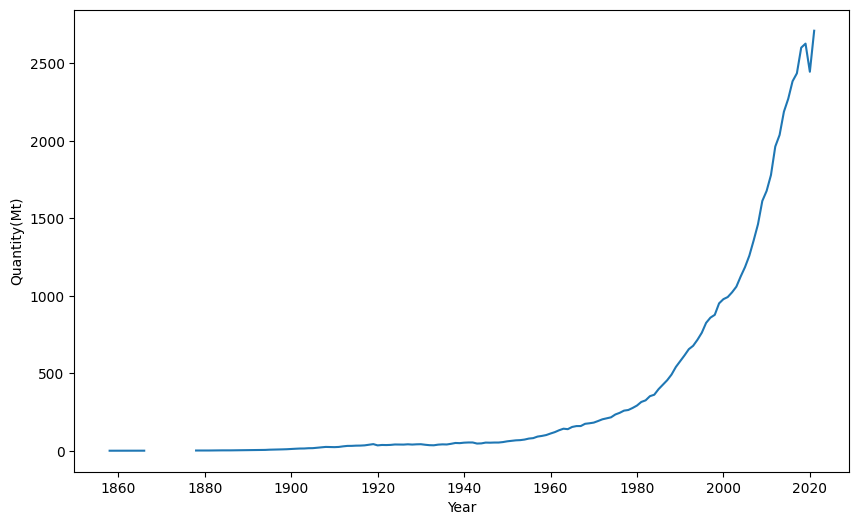

In [6]:
plt.figure(figsize=(10,6)) #size
plt.plot(df.year, df.co2, label = 'co2')
plt.xlabel('Year')
plt.ylabel('Quantity(Mt)')
plt.show()

Delete the row with a null CO2 value

In [7]:
df = df.drop(df[df.year < 1878].index)

In [8]:
facts = ['year','population','gdp','coal_co2','flaring_co2','gas_co2','oil_co2','co2','share_global_co2','temperature_change_from_co2']
df = pd.DataFrame(df, columns=facts)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 21322 to 21465
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         144 non-null    int64  
 1   population                   144 non-null    float64
 2   gdp                          138 non-null    float64
 3   coal_co2                     144 non-null    float64
 4   flaring_co2                  144 non-null    float64
 5   gas_co2                      144 non-null    float64
 6   oil_co2                      144 non-null    float64
 7   co2                          144 non-null    float64
 8   share_global_co2             144 non-null    float64
 9   temperature_change_from_co2  144 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.4 KB


In [10]:
df = df.dropna(how='any', axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 21328 to 21465
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         138 non-null    int64  
 1   population                   138 non-null    float64
 2   gdp                          138 non-null    float64
 3   coal_co2                     138 non-null    float64
 4   flaring_co2                  138 non-null    float64
 5   gas_co2                      138 non-null    float64
 6   oil_co2                      138 non-null    float64
 7   co2                          138 non-null    float64
 8   share_global_co2             138 non-null    float64
 9   temperature_change_from_co2  138 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 11.9 KB


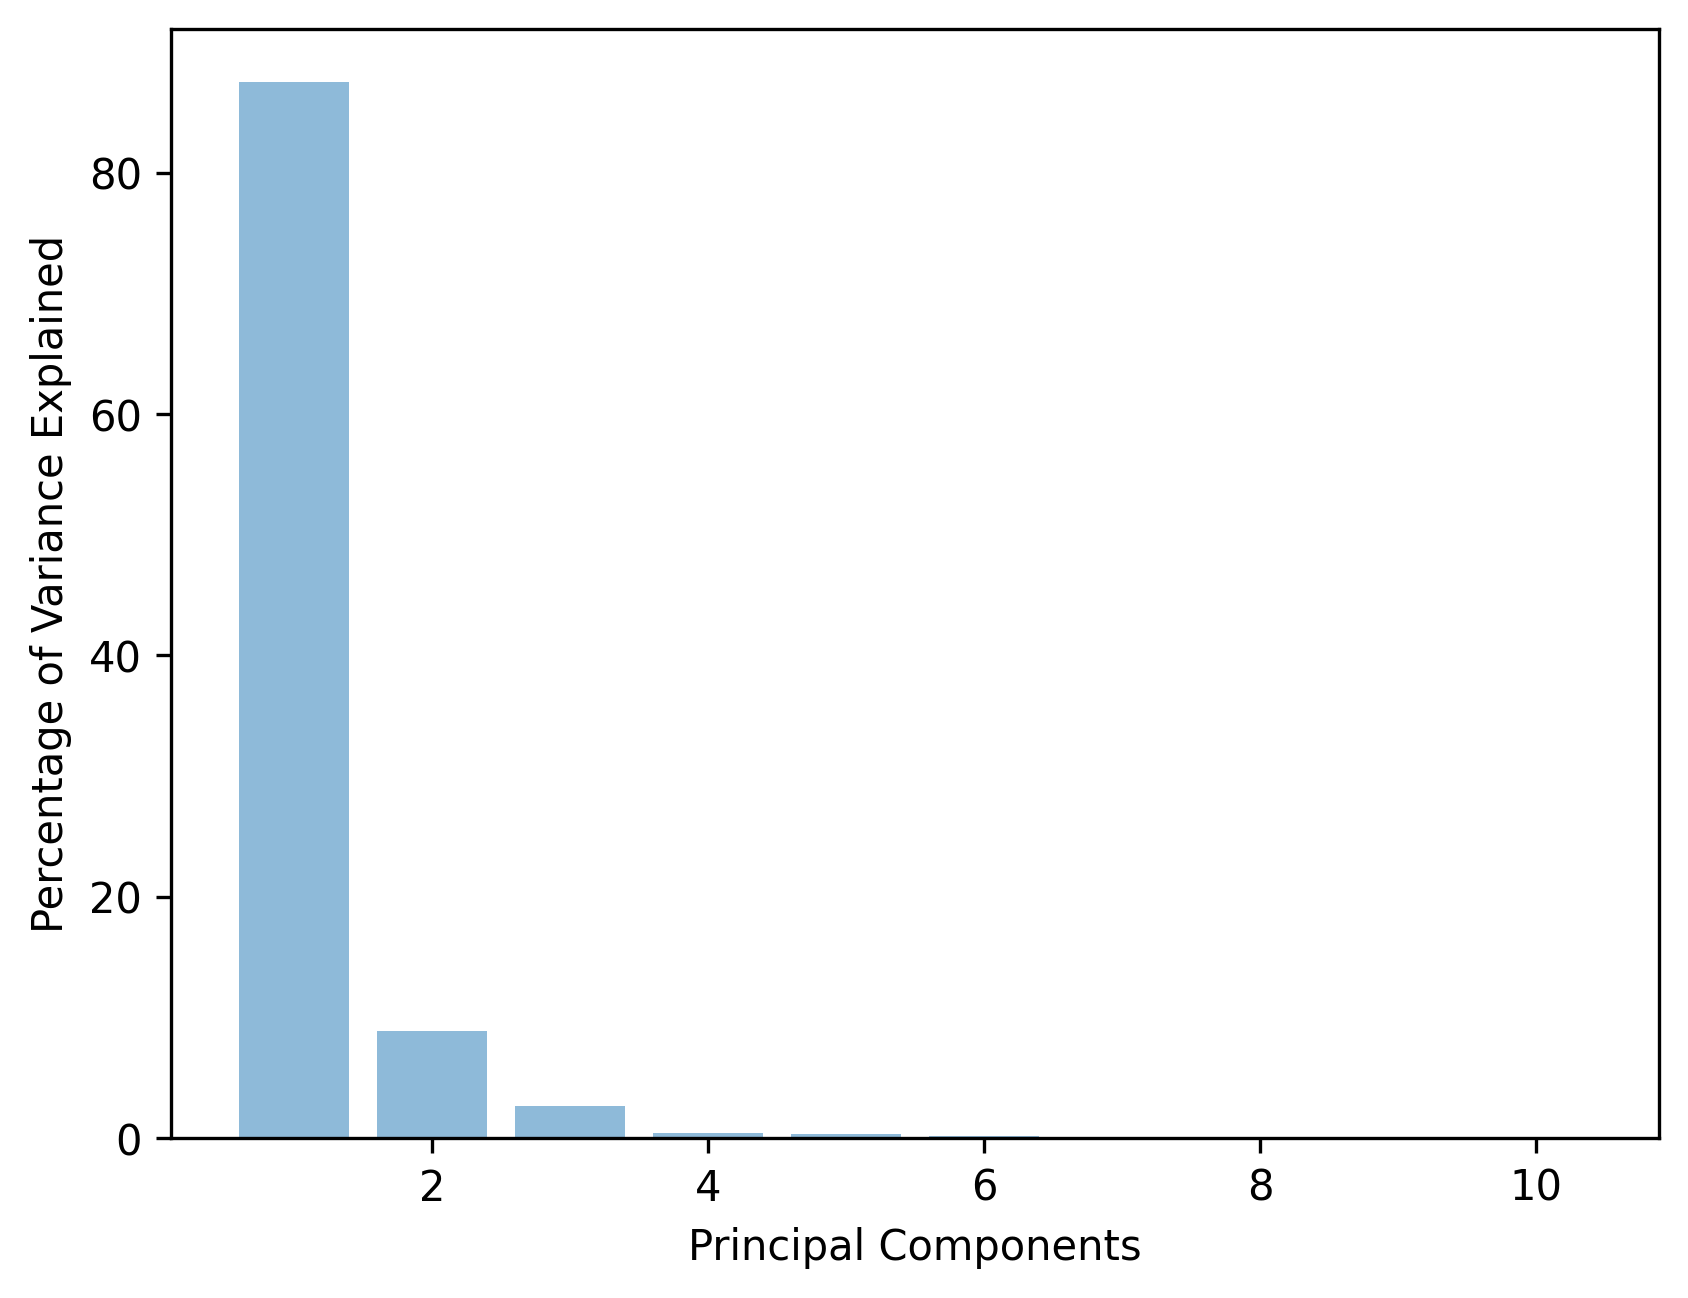

Explained Variance by Principal Component:
Principal Component 1: 87.49%
Principal Component 2: 8.88%
Principal Component 3: 2.68%
Principal Component 4: 0.42%
Principal Component 5: 0.32%
Principal Component 6: 0.15%
Principal Component 7: 0.02%
Principal Component 8: 0.02%
Principal Component 9: 0.02%
Principal Component 10: 0.00%


In [27]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
plt.rcParams['figure.dpi'] = 300

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Calculate the percentage of variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a bar chart to visualize the explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance Explained')
#plt.title('Explained Variance by Principal Component')
plt.show()

print("Explained Variance by Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {variance:.2%}")


In [62]:
pca.components_

array([[ 2.90346448e-01,  3.30106047e-01,  3.26843783e-01,
         3.31592249e-01,  2.04230547e-01,  3.20576870e-01,
         3.34030381e-01,  3.32772956e-01,  3.34943412e-01,
         3.33118281e-01],
       [ 3.74521706e-01,  1.60675762e-01, -2.31960474e-01,
        -1.80089779e-01,  7.85774644e-01, -2.64717930e-01,
        -1.23810378e-01, -1.70856514e-01, -9.35054409e-02,
         8.30493984e-02],
       [-7.06292190e-01, -1.36017270e-01,  1.52256933e-01,
         1.24102975e-01,  5.67434459e-01,  1.88875235e-01,
         8.68792638e-02,  1.20950247e-01, -6.73171212e-03,
        -2.53355320e-01],
       [-2.76903693e-02,  3.94161308e-01, -4.72425709e-01,
        -3.01001000e-01, -4.20166712e-02,  6.81193530e-01,
         8.72069558e-02, -1.42390470e-01,  1.20686505e-02,
        -1.90438119e-01],
       [ 3.36493107e-01, -5.88953974e-01,  1.26924497e-01,
         9.01360178e-02,  1.18852656e-01,  5.41801586e-01,
        -4.53937885e-01, -3.03607073e-02, -3.18522083e-02,
        -6.

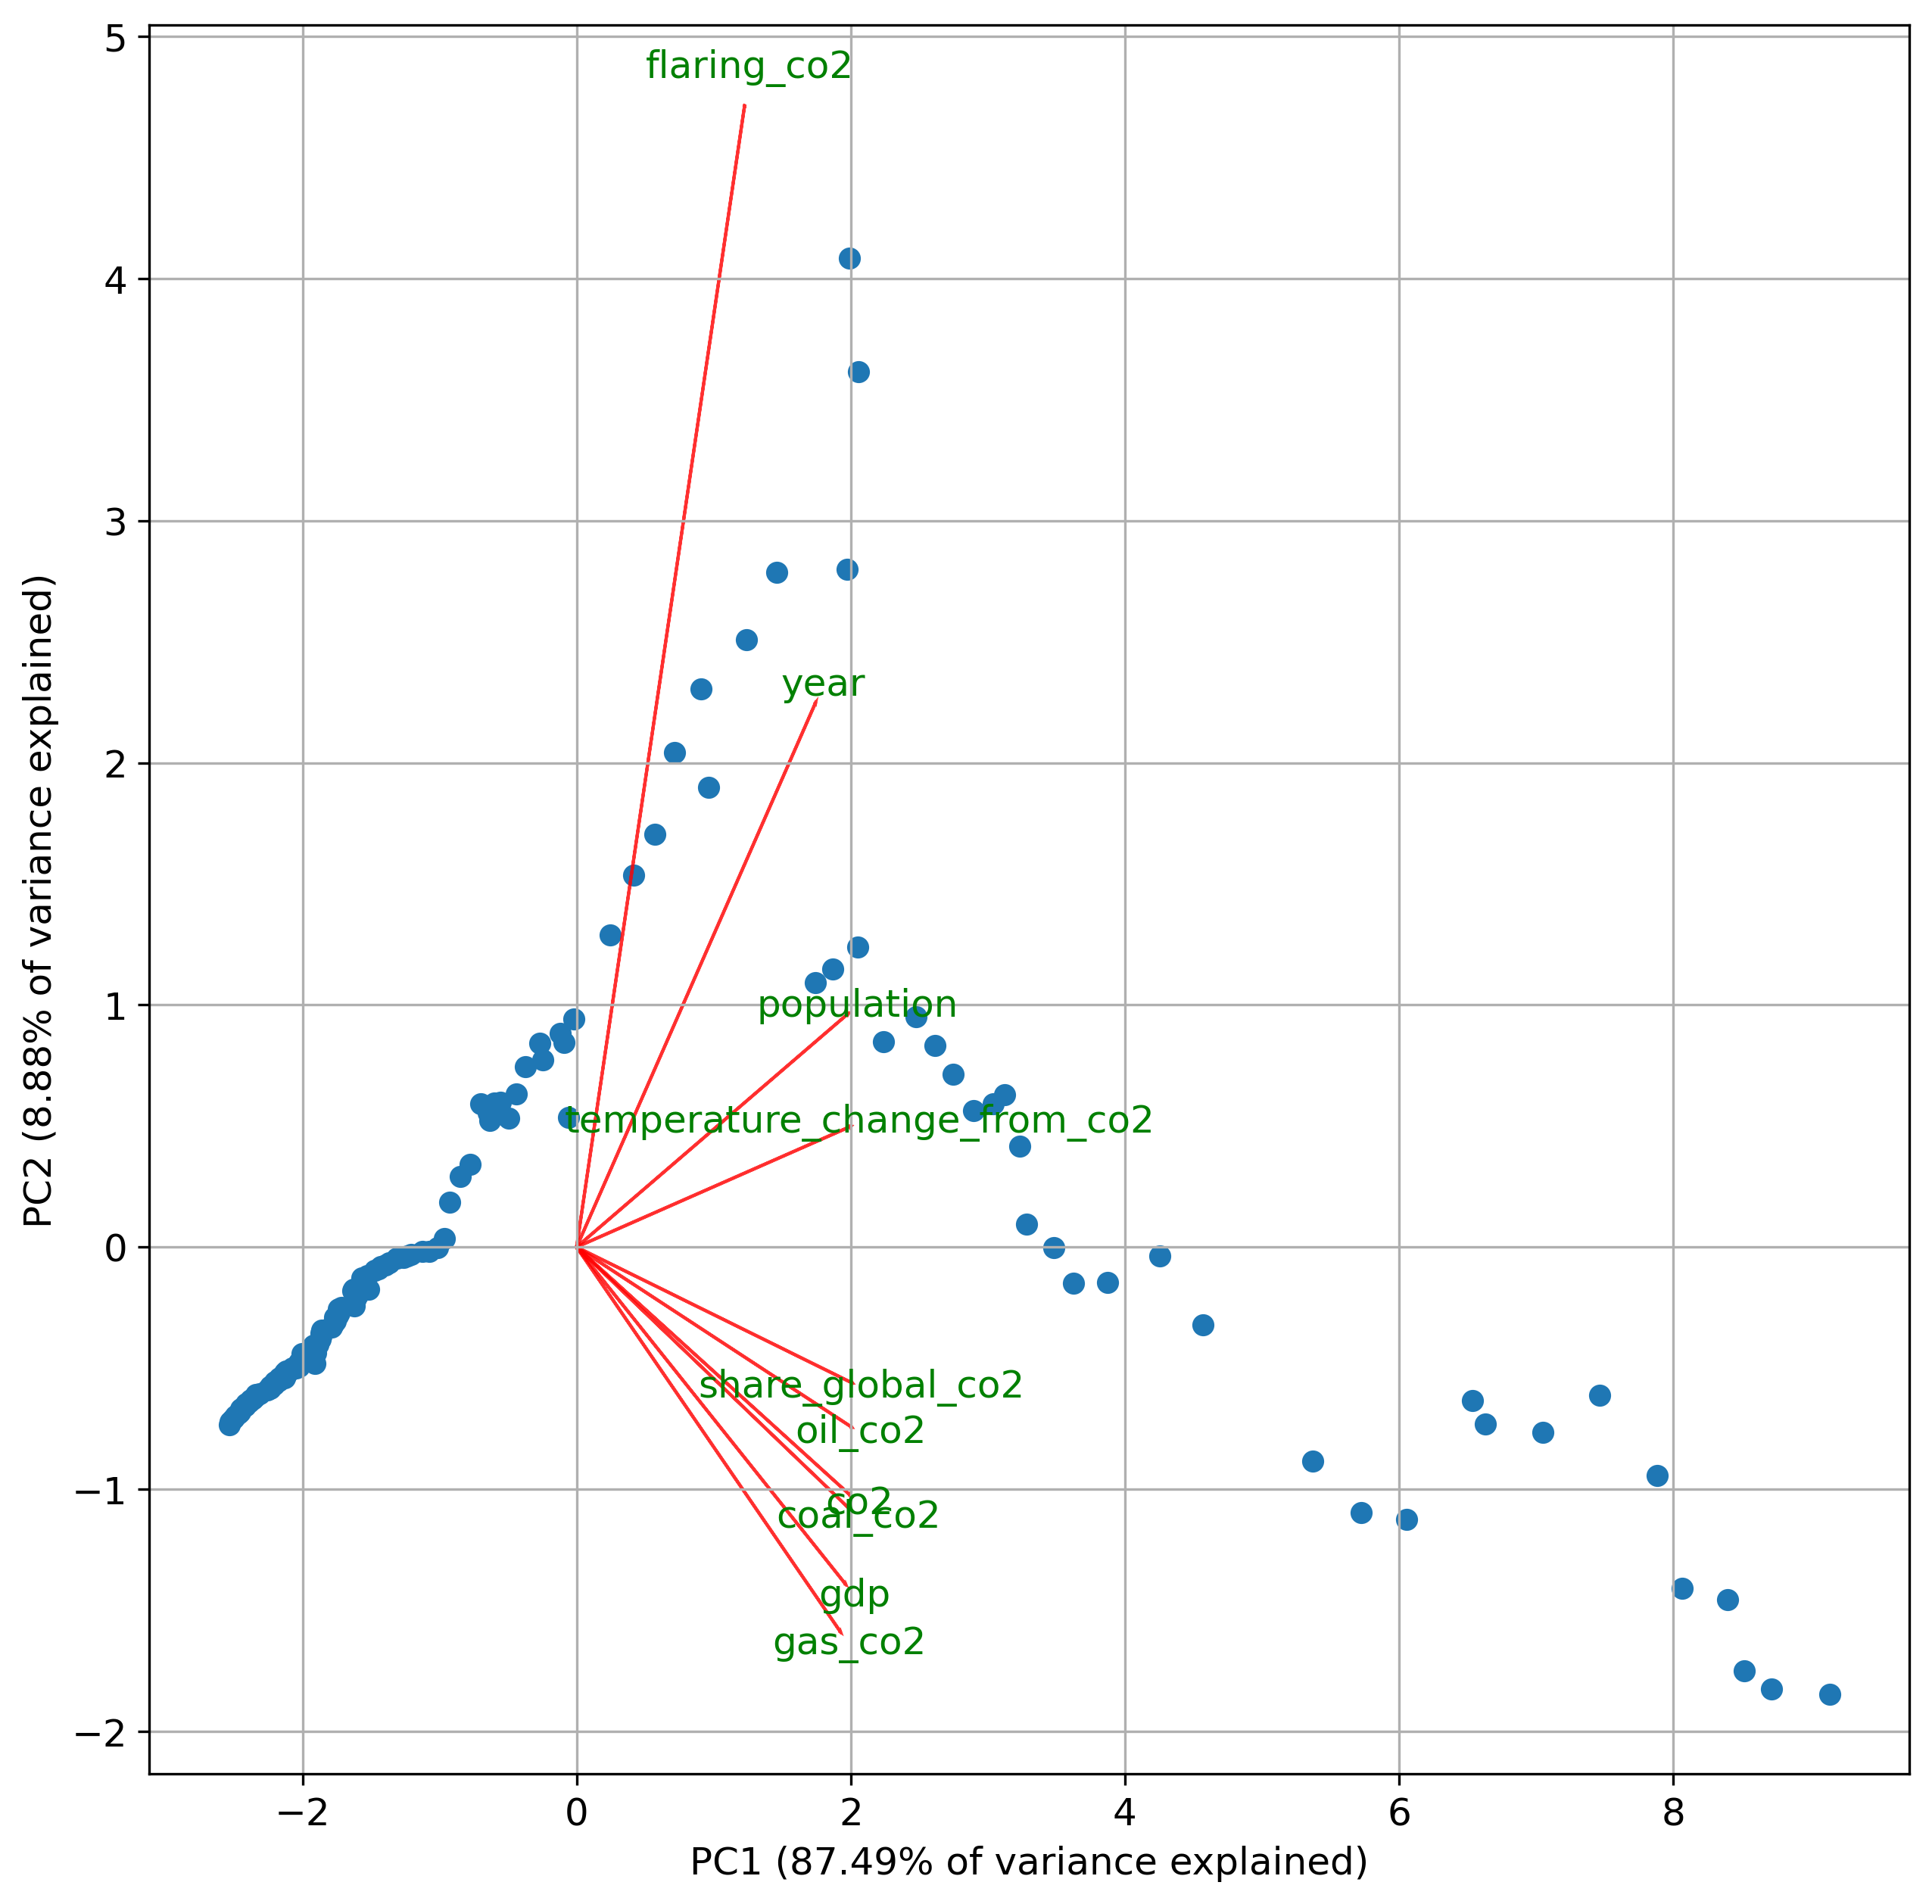

In [67]:
pca_result = pca.transform(df_scaled)[:, :2]
sf = 6
plt.rc('font', size=12)          # controls default text sizes
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 10))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    plt.scatter(xs, ys) #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0] * sf, coeff[i, 1] * sf, color='r', alpha=0.8)
        if labels is None:
            plt.text(coeff[i, 0] * (sf + 0.2), coeff[i, 1] * (sf + 0.2), f"Var {i+1}", color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * (sf + 0.2), coeff[i, 1] * (sf + 0.2), labels[i], color='g', ha='center', va='center')

    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
    plt.xlabel(f"PC1 ({explained_variance[0]:.2%} of variance explained)")
    plt.ylabel(f"PC2 ({explained_variance[1]:.2%} of variance explained)")
    plt.grid()
    plt.show()

biplot(pca_result, pca.components_.T, labels=df.columns)

<Axes: >

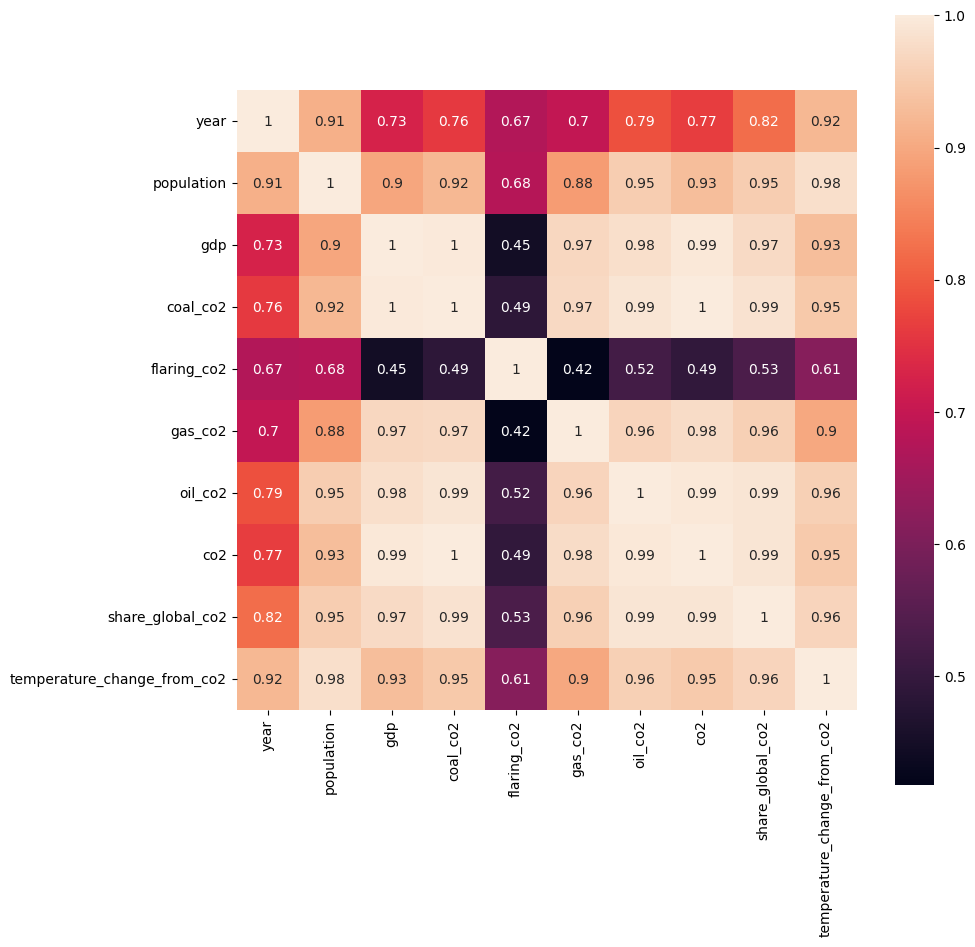

In [13]:
corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,annot=True, square=True)

In [20]:
print (df.describe ().applymap('{:,.2f}'.format).to_latex ())

\begin{tabular}{lllllllllll}
\toprule
{} &      year &        population &                    gdp &  coal\_co2 & flaring\_co2 & gas\_co2 & oil\_co2 &       co2 & share\_global\_co2 & temperature\_change\_from\_co2 \\
\midrule
count &    138.00 &            138.00 &                 138.00 &    138.00 &      138.00 &  138.00 &  138.00 &    138.00 &           138.00 &                      138.00 \\
mean  &  1,952.50 &    581,613,152.10 &   1,466,847,826,086.96 &    268.13 &        1.32 &   17.99 &  107.23 &    413.68 &             1.89 &                        0.01 \\
std   &     39.98 &    353,389,980.94 &   2,159,338,287,065.73 &    426.42 &        2.05 &   36.85 &  176.16 &    673.40 &             1.72 &                        0.01 \\
min   &  1,884.00 &    263,098,048.00 &     234,000,000,000.00 &      2.25 &        0.00 &    0.00 &    0.20 &      2.46 &             0.24 &                        0.00 \\
25\%   &  1,918.25 &    298,634,391.75 &     336,000,000,000.00 &     32.06 &     

/tmp/ipykernel_649514/4013373436.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print (df.describe ().applymap('{:,.2f}'.format).to_latex ())
